# Comparison of QR algorithms

IAM 961 Numerical Linear Algebra, University of New Hampshire, J. Gibson 2024-09-23

  1. Construct matrix $A$ with known QR decomposition and given singular values.
  2. Compute QR decomposition of $A$ using Classical Graham-Schmidt, Modified Gram-Schmidt, and Householder algorithms.
  3. Show the deviations of the three QR factorizations from ideal, in terms of $Ax=b$ error and nonorthogonality.

In [1]:
using LinearAlgebra
using Plots
using GenericSVD

include("qralgorithms.jl") # my code for QR algorithms

randomNormal (generic function with 2 methods)

## Construct random matrix $A$ with known QR decomposition

Build $A$ as product of random unitary $Q$ and upper-triangular $R$ with a specified singular value spectrum and condition number.

Note that the matrix element type is parameterized. Choice for type include `Float16, Float32, Float64, BigFloat, ComplexF16, ...`.

In [2]:
# matrix A parameters
m = 5               # size of matrix A, m x m
κ = 1e12            # condition number for matrix A
T = Float64         # matrix element type
setprecision(256)   # bits of precision for BigFloat
ϵ = eps(T)          # machine precision 

# construct singular value spectrum 
c = κ^(-one(T)/(m-1) )  # auxiliary variable for singular values
σ = c.^(0:m-1)          # singular values log-scaled between 1 and 1/κ
Σ = diagm(σ)   

# construct Q,R matrices
(U,tmp) = qr(randomNormal(T,m,m)) # set U to random unitary matrix
(V,tmp) = qr(randomNormal(T,m,m)) # set V to random unitary matrix
(tmp,R) = qr(U*Σ*V')              # set R to random up-tri with given singular values
rectify!(R)                       # make Rjj positive
(Q,tmp) = qr(randomNormal(T,m,m)) # set Q to random unitary matrix 

# set A to known QR decomposition
A = Q*R

5×5 Matrix{Float64}:
 -0.0583458   0.10115     0.341615  -0.0712581  -0.101789
 -0.0613938   0.106024    0.359004  -0.0749985  -0.107541
  0.0346338  -0.0599295  -0.202659   0.042305    0.0605431
  0.0651125  -0.113234   -0.381628   0.0795075   0.113222
  0.103582   -0.179977   -0.606927   0.126489    0.180282

In [3]:
cond(A)

1.0000017126029948e12

In [4]:
svdvals(A)

5-element Vector{Float64}:
 0.9999999999999998
 0.0010000000000000419
 9.999999999760044e-7
 1.0000000271921362e-9
 9.99998287399938e-13

## Examine and verify the constructed QR decomposition of $A$

In [5]:
Q

5×5 LinearAlgebra.QRCompactWYQ{Float64, Matrix{Float64}, Matrix{Float64}}

In [6]:
Matrix(Q)

5×5 Matrix{Float64}:
 -0.381893  -0.138541  -0.334333  -0.815783   -0.240174
 -0.401844  -0.783689  -0.244393   0.377823    0.147899
  0.22669    0.257727  -0.889863   0.259464   -0.151695
  0.426184  -0.393312   0.143968   0.0439955  -0.800632
  0.677981  -0.381471  -0.126141  -0.349987    0.506379

In [7]:
R

5×5 Matrix{Float64}:
 0.15278  -0.265099    -0.894793      0.186583     0.266293
 0.0       0.00064337   0.000717858   2.77362e-5   0.000680152
 0.0       0.0          3.26627e-6   -1.51194e-6  -2.08388e-6
 0.0       0.0          0.0           1.33035e-9   8.21971e-10
 0.0       0.0          0.0           0.0          2.34127e-12

In [8]:
Q'*Q

5×5 Matrix{Float64}:
  1.0           5.55112e-17  -5.55112e-17   3.33067e-16   1.11022e-16
 -5.55112e-17   1.0           0.0          -1.66533e-16  -1.11022e-16
  1.11022e-16   5.55112e-17   1.0           1.11022e-16   2.77556e-17
  0.0          -2.77556e-16   8.32667e-17   1.0           3.33067e-16
  0.0          -1.11022e-16   0.0           2.22045e-16   1.0

In [9]:
norm(I-Q'*Q)

1.0941471808815786e-15

In [10]:
Q*R

5×5 Matrix{Float64}:
 -0.0583458   0.10115     0.341615  -0.0712581  -0.101789
 -0.0613938   0.106024    0.359004  -0.0749985  -0.107541
  0.0346338  -0.0599295  -0.202659   0.042305    0.0605431
  0.0651125  -0.113234   -0.381628   0.0795075   0.113222
  0.103582   -0.179977   -0.606927   0.126489    0.180282

In [11]:
A

5×5 Matrix{Float64}:
 -0.0583458   0.10115     0.341615  -0.0712581  -0.101789
 -0.0613938   0.106024    0.359004  -0.0749985  -0.107541
  0.0346338  -0.0599295  -0.202659   0.042305    0.0605431
  0.0651125  -0.113234   -0.381628   0.0795075   0.113222
  0.103582   -0.179977   -0.606927   0.126489    0.180282

In [12]:
A - Q*R

5×5 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0

## Construct $Ax=b$ problem with known solution $x$

In [13]:
x = randomNormal(T,m)
b = A*x

5-element Vector{Float64}:
  0.23508001239144624
  0.24797172533617517
 -0.1397157058541976
 -0.2618203593293926
 -0.4167438877359533

In [14]:
A

5×5 Matrix{Float64}:
 -0.0583458   0.10115     0.341615  -0.0712581  -0.101789
 -0.0613938   0.106024    0.359004  -0.0749985  -0.107541
  0.0346338  -0.0599295  -0.202659   0.042305    0.0605431
  0.0651125  -0.113234   -0.381628   0.0795075   0.113222
  0.103582   -0.179977   -0.606927   0.126489    0.180282

In [15]:
A*x

5-element Vector{Float64}:
  0.23508001239144624
  0.24797172533617517
 -0.1397157058541976
 -0.2618203593293926
 -0.4167438877359533

In [16]:
b

5-element Vector{Float64}:
  0.23508001239144624
  0.24797172533617517
 -0.1397157058541976
 -0.2618203593293926
 -0.4167438877359533

In [17]:
A*x-b

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

## Compute and compare QR decompositions with three different algorithms

In [18]:
# compute QR decomp via three different algorithms
(Qg, Rg) = qrcgs(A)    # Classical Gram-Schmidt
(Qm, Rm) = qrmgs(A)    # Modified Gram-Schmidt
(Qh, Rh) = qrhouse(A); # Householder

In [19]:
# compute error of QR decomps A = QR
@show norm(A-Q*R)
@show norm(A-Qg*Rg)
@show norm(A-Qm*Rm)
@show norm(A-Qh*Rh);

norm(A - Q * R) = 0.0
norm(A - Qg * Rg) = 3.1031676915590914e-17
norm(A - Qm * Rm) = 3.469446951953614e-17
norm(A - Qh * Rh) = 9.352589120089009e-16


In [20]:
eps(BigFloat)

1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77

In [21]:
# compute norm of QR solution to Ax=b
@show norm(x)
@show norm(A*x - b)
@show norm(x - backsolve(R, Q'*b))/norm(x)
@show norm(x - backsolve(Rg, Qg'*b))/norm(x)
@show norm(x - backsolve(Rm, Qm'*b))/norm(x)
@show norm(x - backsolve(Rh, Qh'*b))/norm(x);

norm(x) = 3.0252468937598005
norm(A * x - b) = 0.0
norm(x - backsolve(R, Q' * b)) / norm(x) = 0.00010579702298078701
norm(x - backsolve(Rg, Qg' * b)) / norm(x) = 32.044490271094084
norm(x - backsolve(Rm, Qm' * b)) / norm(x) = 499365.97988385084
norm(x - backsolve(Rh, Qh' * b)) / norm(x) = 3.04342553976286e-6


In [22]:
R

5×5 Matrix{Float64}:
 0.15278  -0.265099    -0.894793      0.186583     0.266293
 0.0       0.00064337   0.000717858   2.77362e-5   0.000680152
 0.0       0.0          3.26627e-6   -1.51194e-6  -2.08388e-6
 0.0       0.0          0.0           1.33035e-9   8.21971e-10
 0.0       0.0          0.0           0.0          2.34127e-12

In [23]:
Rg

5×5 Matrix{Float64}:
 0.15278  -0.265099    -0.894793      0.186583     0.266293
 0.0       0.00064337   0.000717858   2.77362e-5   0.000680152
 0.0       0.0          3.26627e-6   -1.51193e-6  -2.08386e-6
 0.0       0.0          0.0           1.33037e-9   2.28122e-8
 0.0       0.0          0.0           0.0          2.19902e-8

In [24]:
Rm

5×5 Matrix{Float64}:
 0.15278  -0.265099    -0.894793      0.186583     0.266293
 0.0       0.00064337   0.000717858   2.77362e-5   0.000680152
 0.0       0.0          3.26627e-6   -1.51194e-6  -2.08388e-6
 0.0       0.0          0.0           1.33035e-9   8.21971e-10
 0.0       0.0          0.0           0.0          2.34125e-12

In [25]:
Rh

5×5 Matrix{Float64}:
 0.15278  -0.265099    -0.894793      0.186583     0.266293
 0.0       0.00064337   0.000717858   2.77362e-5   0.000680152
 0.0       0.0          3.26627e-6   -1.51194e-6  -2.08388e-6
 0.0       0.0          0.0           1.33035e-9   8.21971e-10
 0.0       0.0          0.0           0.0          2.34128e-12

In [26]:
# show errors in R matrices
@show norm(Rg - R)
@show norm(Rm - R)
@show norm(Rh - R)

norm(Rg - R) = 3.109723491062542e-8
norm(Rm - R) = 1.3685661779160217e-16
norm(Rh - R) = 5.31061657730251e-16


5.31061657730251e-16

In [27]:
Qg

5×5 Matrix{Float64}:
 -0.381893  -0.138541  -0.334333  -0.813818   0.814011
 -0.401844  -0.783689  -0.244393   0.379238  -0.379066
  0.22669    0.257727  -0.889863   0.264658  -0.2641
  0.426184  -0.393312   0.143968   0.043151  -0.0433295
  0.677981  -0.381471  -0.126141  -0.349247   0.349383

In [28]:
Qm

5×5 Matrix{Float64}:
 -0.381893  -0.138541  -0.334333  -0.815783   -0.240175
 -0.401844  -0.783689  -0.244393   0.377823    0.147898
  0.22669    0.257727  -0.889863   0.259464   -0.151695
  0.426184  -0.393312   0.143968   0.0439955  -0.80063
  0.677981  -0.381471  -0.126141  -0.349987    0.506381

In [29]:
Qh

5×5 Matrix{Float64}:
 -0.381893  -0.138541  -0.334333  -0.815783   -0.240174
 -0.401844  -0.783689  -0.244393   0.377823    0.147899
  0.22669    0.257727  -0.889863   0.259464   -0.151695
  0.426184  -0.393312   0.143968   0.0439955  -0.800632
  0.677981  -0.381471  -0.126141  -0.349987    0.506379

In [30]:
Q_ = Matrix(Q)

5×5 Matrix{Float64}:
 -0.381893  -0.138541  -0.334333  -0.815783   -0.240174
 -0.401844  -0.783689  -0.244393   0.377823    0.147899
  0.22669    0.257727  -0.889863   0.259464   -0.151695
  0.426184  -0.393312   0.143968   0.0439955  -0.800632
  0.677981  -0.381471  -0.126141  -0.349987    0.506379

In [31]:
# show errors in Q matrices
@show norm(Qg - Q_)
@show norm(Qm - Q_)
@show norm(Qh - Q_)

norm(Qg - Q_) = 1.4141503387149232
norm(Qm - Q_) = 2.4565014376127577e-6
norm(Qh - Q_) = 3.362315182401789e-8


3.362315182401789e-8

In [32]:
# show nonnormality of Q matrices, via error of Q' Q = I
@show norm(Q'*Q - I)
@show norm(Qg'*Qg - I)
@show norm(Qm'*Qm - I)
@show norm(Qh'*Qh - I)

norm(Q' * Q - I) = 1.0941471808815786e-15
norm(Qg' * Qg - I) = 1.4142564453808684
norm(Qm' * Qm - I) = 3.473975274028013e-6
norm(Qh' * Qh - I) = 2.190249624721117e-15


2.190249624721117e-15

## Plot devation of Q matrices from orthogonality

We'll do this on a larger matrix (64 x 64) with the same condition number
so that the plots are smoother.

In [33]:
# matrix A parameters
m = 64              # size of matrix A, m x m
κ = 1e12            # condition number for matrix A
T = Float64         # matrix element type
setprecision(256)   # bits of precision for BigFloat
ϵ = eps(T)          # machine precision 

# construct A with known QR decomposition and condition number

c = κ^(-one(T)/(m-1) )  # auxiliary variable for singular values
σ = c.^(0:m-1)          # singular values log-scaled between 1 and 1/κ
Σ = diagm(σ)   

(U,tmp) = qr(randomNormal(T,m,m)) # set U to random unitary matrix
(V,tmp) = qr(randomNormal(T,m,m)) # set V to random unitary matrix
(tmp,R) = qr(U*Σ*V')              # set R random up-tri with given sing vals
rectify!(R)                       # make Rjj positive
(Q,tmp) = qr(randomNormal(T,m,m)) # set Q to random unitary matrix 

# construct Ax=b problem with known solution x
A = Q*R
x = randomNormal(T,m)
b = A*x

# compute QR decomp via three different algorithms
(Qg, Rg) = qrcgs(A)
(Qm, Rm) = qrmgs(A)
(Qh, Rh) = qrhouse(A);

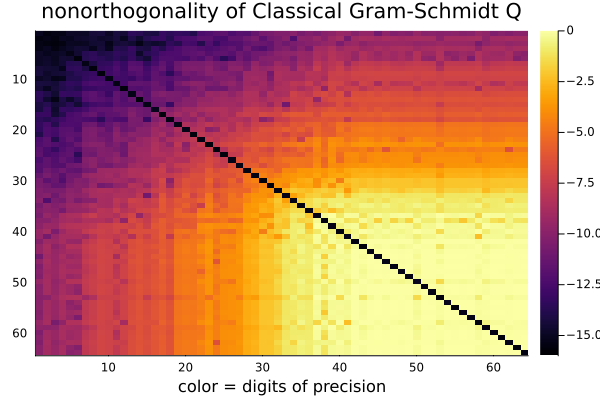

In [34]:
heatmap(log10.(abs.(Qg'*Qg-I) .+ ϵ), yflip=true, clims=(round(log10(ϵ)),0), xlabel="color = digits of precision")
plot!(title="nonorthogonality of Classical Gram-Schmidt Q")

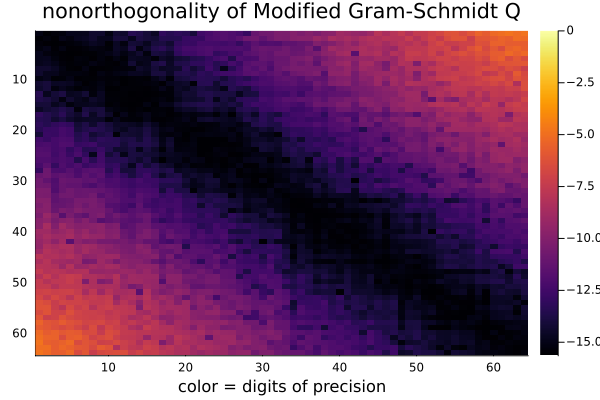

In [35]:
heatmap(log10.(abs.(Qm'*Qm-I) .+ ϵ), yflip=true, clims=(log10(ϵ),0), xlabel="color = digits of precision")
plot!(title="nonorthogonality of Modified Gram-Schmidt Q")

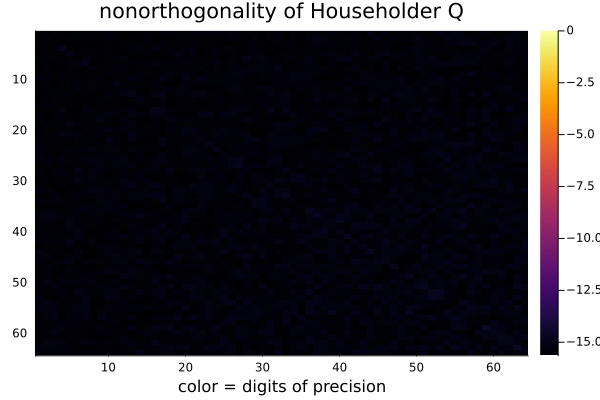

In [36]:
heatmap(log10.(abs.(Qh'*Qh-I) .+ ϵ), yflip=true, clims=(log10(ϵ),0), xlabel="color = digits of precision")
plot!(title="nonorthogonality of Householder Q")

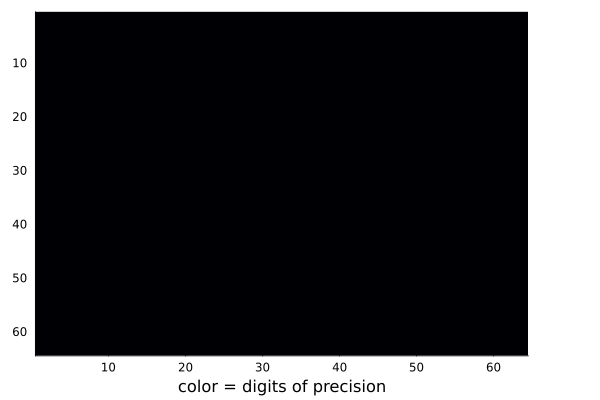

GKS: Possible loss of precision in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range
GKS: Rectangle definition is invalid in routine SET_WINDOW
GKS: Rectangle definition is invalid in routine CELLARRAY
invalid range


In [37]:
heatmap(log10.(abs.(Qh'*Qh-I) .+ ϵ), yflip=true,clims=(-15, -17), xlabel="color = digits of precision")

# Floating point arithmetic

In [38]:
π

π = 3.1415926535897...

In [39]:
typeof(π)

Irrational{:π}

In [40]:
big(π)

3.141592653589793238462643383279502884197169399375105820974944592307816406286198

In [41]:
typeof(big(π))

BigFloat

In [42]:
2.6 - 0.9 - 1.7

2.220446049250313e-16

In [43]:
x = big(26)/10 - big(9)/10 - big(17)/10

-1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77

In [44]:
typeof(x)

BigFloat

In [45]:
1//7

1//7

In [46]:
typeof(1//7)

Rational{Int64}

In [47]:
1//3 + 5//7*im

1//3 + 5//7*im

In [48]:
typeof(1//3+big(5im)//7)

Complex{Rational{BigInt}}

In [49]:
2.6 - 0.9 - 1.7

2.220446049250313e-16

In [50]:
2^-52

2.220446049250313e-16

In [51]:
eps(BigFloat)

1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77

In [52]:
eps(Float32)

1.1920929f-7

In [53]:
big(26)/10 - big(7)/10 - big(19)/10

-1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77

In [54]:
typeof(big(19.0))

BigFloat

In [55]:
eps(BigFloat)

1.727233711018888925077270372560079914223200072887256277004740694033718360632485e-77

In [56]:
setprecision(1024)

1024

In [57]:
BigFloat(pi)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724586997

In [58]:
π

π = 3.1415926535897...

In [59]:
T = Float64
pie = T(pi)

3.141592653589793

In [60]:
exponent(pie)

1

In [61]:
significand(pie)

1.5707963267948966

In [62]:
for T in [Float16; Float32; Float64; BigFloat]
    @show eps(T)
end

eps(T) = Float16(0.000977)
eps(T) = 1.1920929f-7
eps(T) = 2.220446049250313e-16
eps(T) = 1.112536929253600691545116358666202032109607990231165915276663708443602217406959097927141579506255510282033669865517905502576217080776730054428006192688859410565388996766001165239805073721291818035960782523471251867104187625403325308329079474360245589984295819824250317954385059152437399890443876874974725790226e-308


In [63]:
for T in [Float16; Float32; Float64; BigFloat]
    @show nextfloat(T(0))
end

nextfloat(T(0)) = Float16(6.0e-8)
nextfloat(T(0)) = 1.0f-45
nextfloat(T(0)) = 5.0e-324
nextfloat(T(0)) = 8.509691311740836139129787909620482805677559969829696249082648978501354310803010377127816538635331762070413076777194656255902615643333253714574540233167280468390310923283347109845692741140268554454842127760791188751981023794850347126214252738995078726629170621810526742879659735485312198018226584974754261841297e-1388255822130839284


In [64]:
function f(x)
    4x+3
end

f (generic function with 1 method)

In [65]:
@code_lowered f(1.0)

CodeInfo(
1 ─ %1 = 4 * x
│   %2 = %1 + 3
└──      return %2
)

In [66]:
@code_llvm f(1.0)

;  @ In[64]:1 within `f`
define double @julia_f_2749(double %0) #0 {
top:
;  @ In[64]:2 within `f`
; ┌ @ promotion.jl:423 within `*` @ float.jl:411
   %1 = fmul double %0, 4.000000e+00
; └
; ┌ @ promotion.jl:422 within `+` @ float.jl:409
   %2 = fadd double %1, 3.000000e+00
; └
  ret double %2
}


In [67]:
@code_native f(1.0)

	.text
	.file	"f"
	.section	.rodata.cst8,"aM",@progbits,8
	.p2align	3                               # -- Begin function julia_f_2786
.LCPI0_0:
	.quad	0x4010000000000000              # double 4
.LCPI0_1:
	.quad	0x4008000000000000              # double 3
	.text
	.globl	julia_f_2786
	.p2align	4, 0x90
	.type	julia_f_2786,@function
julia_f_2786:                           # @julia_f_2786
; ┌ @ In[64]:1 within `f`
# %bb.0:                                # %top
	push	rbp
	movabs	rax, offset .LCPI0_0
	mov	rbp, rsp
; │ @ In[64]:2 within `f`
; │┌ @ promotion.jl:423 within `*` @ float.jl:411
	vmulsd	xmm0, xmm0, qword ptr [rax]
	movabs	rax, offset .LCPI0_1
; │└
; │┌ @ promotion.jl:422 within `+` @ float.jl:409
	vaddsd	xmm0, xmm0, qword ptr [rax]
; │└
	pop	rbp
	ret
.Lfunc_end0:
	.size	julia_f_2786, .Lfunc_end0-julia_f_2786
; └
                                        # -- End function
	.section	".note.GNU-stack","",@progbits


In [68]:
using Polynomials

P = Polynomial([2, 3, 1])

Polynomial(2 + 3*x + x^2)

In [69]:
P(3)

20

In [70]:
typeof(P)

Polynomial{Int64, :x} (alias for Polynomials.MutableDensePolynomial{Polynomials.StandardBasis, Int64, :x})

In [71]:
R = Polynomial([1//2, 3//4, 5//7])

Polynomial(1//2 + 3//4*x + 5//7*x^2)

In [72]:
typeof(1//3)

Rational{Int64}

In [73]:
big(1)//3 + 13//57*im

1//3 + 13//57*im

In [74]:
typeof(ans)

Complex{Rational{BigInt}}

In [75]:
bitstring(0.5)

"0011111111100000000000000000000000000000000000000000000000000000"

In [76]:
bitstring(5.25)

"0100000000010101000000000000000000000000000000000000000000000000"

In [77]:
typeof(Float64)

DataType